# Unsupervised Learning

In [1]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
# The labels are 1-indexed, so we need to subtract 1 to make them 0-indexed
y_fruits = fruits[['fruit_label']] - 1

## Clustering

### K-means

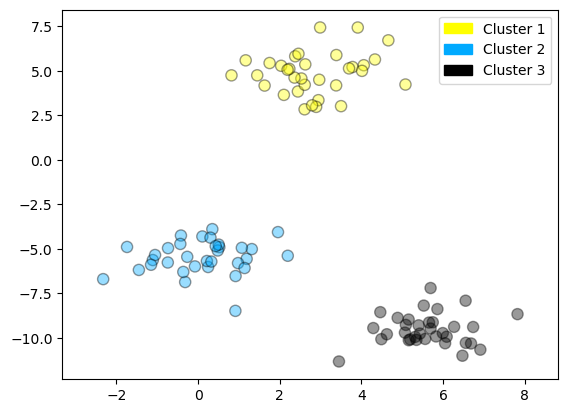

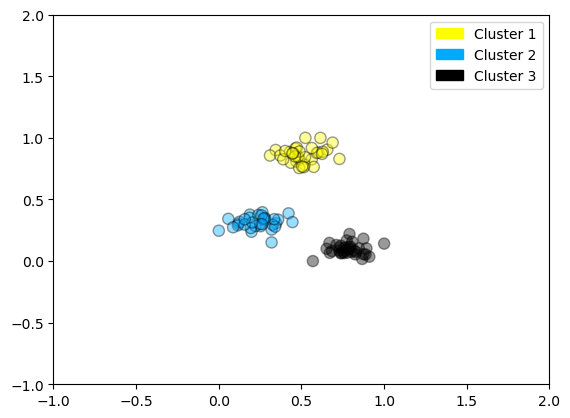

[1 1 0 2 0 0 2 1 0 2 2 0 0 1 1 0 2 0 2 0 2 1 0 1 2 0 0 0 0 2 1 0 0 2 1 1 1
 0 0 0 1 2 1 1 0 2 2 2 1 2 0 1 2 2 1 2 0 1 2 2 0 0 1 1 1 2 2 1 1 1 0 2 0 0
 1 0 0 1 2 2 2 0 2 0 1 0 1 2 1 1 2 2 2 1 1 1 0 2 2 2]


In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

X, y = make_blobs(random_state = 10)

X_normalized = MinMaxScaler().fit(X).transform(X) 

kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(X_normalized)

plot_labelled_scatter(X_normalized, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

print(kmeans.labels_)

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

# In unsupervised learning, we don't have labels for the data, there is no traning and no test set
X, y = make_blobs(random_state = 10)

X_normalized = MinMaxScaler().fit(X).transform(X) 

kmeans = KMeans(init='k-means++', n_clusters = 4, n_init=10, random_state=42)
kmeans.fit(X_normalized)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [4]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[[0.44957138 0.84456739]
 [0.23794168 0.31237463]
 [0.78289451 0.095112  ]
 [0.61330249 0.89327178]]
0.9263118135832991


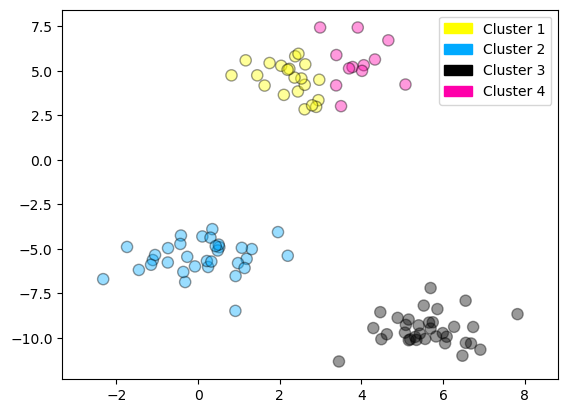

In [5]:
plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4'])

Initialization complete
Iteration 0, inertia 1.744459798445392.
Iteration 1, inertia 1.149140848687804.
Converged at iteration 1: strict convergence.


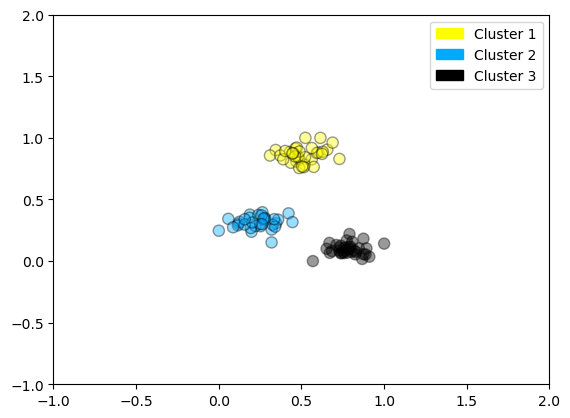

In [6]:
kmeans = KMeans( n_clusters = 3, verbose=2, random_state=42)

kmeans.fit(X_normalized)

plot_labelled_scatter(X_normalized, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

In [7]:
kmeans.cluster_centers_

array([[0.50910997, 0.86227808],
       [0.23794168, 0.31237463],
       [0.78289451, 0.095112  ]])

In [8]:
kmeans.labels_

array([1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1,
       0, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2], dtype=int32)

In [9]:
kmeans.n_iter_

2

In [10]:
kmeans.predict([[0, 0], [1, 1]])

array([1, 0], dtype=int32)

In [11]:
kmeans.inertia_

1.149140848687804

##  Selection of optimum number of clusters through the 'Elbow' method (método del codo) ( K vs 'inertia_')

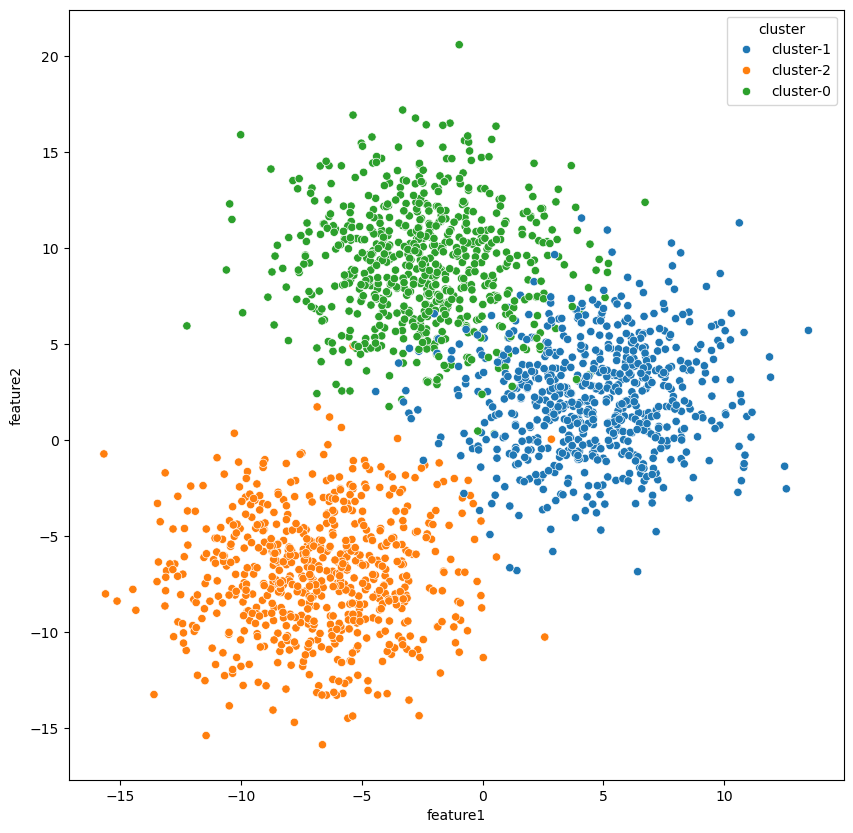

In [12]:
# Assistant
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt  # Added missing import
import pandas as pd  # Added for DataFrame creation

# Generate the data
n_samples = 2000
n_features = 2
centers = 3
cluster_std = 3

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, 
                  cluster_std=cluster_std, random_state=42)

# Create a DataFrame for better seaborn integration
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['cluster'] = ['cluster-{}'.format(x) for x in y]

# Create the plot
fig = plt.figure(figsize=(10, 10))
# Corrected scatterplot syntax using x=, y=, and data= parameters
sns.scatterplot(data=df, x='feature1', y='feature2', hue='cluster')
plt.show()  # Added to display the plot

For n_clusters = 2 The inertia is : 67648.55689693673
For n_clusters = 3 The inertia is : 33893.01214279931
For n_clusters = 4 The inertia is : 29456.972202349232
For n_clusters = 5 The inertia is : 25358.031323445884
For n_clusters = 6 The inertia is : 22410.096464073933
For n_clusters = 7 The inertia is : 18958.547639862565
For n_clusters = 8 The inertia is : 16638.63198572956
For n_clusters = 9 The inertia is : 15545.836865897441
For n_clusters = 10 The inertia is : 13757.213134433192
For n_clusters = 11 The inertia is : 12634.77119204019
For n_clusters = 12 The inertia is : 11828.148160662506
For n_clusters = 13 The inertia is : 11068.175160501136
For n_clusters = 14 The inertia is : 10219.080319914929
For n_clusters = 15 The inertia is : 9990.498309999368
For n_clusters = 16 The inertia is : 9098.525116279221
For n_clusters = 17 The inertia is : 8472.01084054561
For n_clusters = 18 The inertia is : 8182.07508397643
For n_clusters = 19 The inertia is : 7593.222551206098


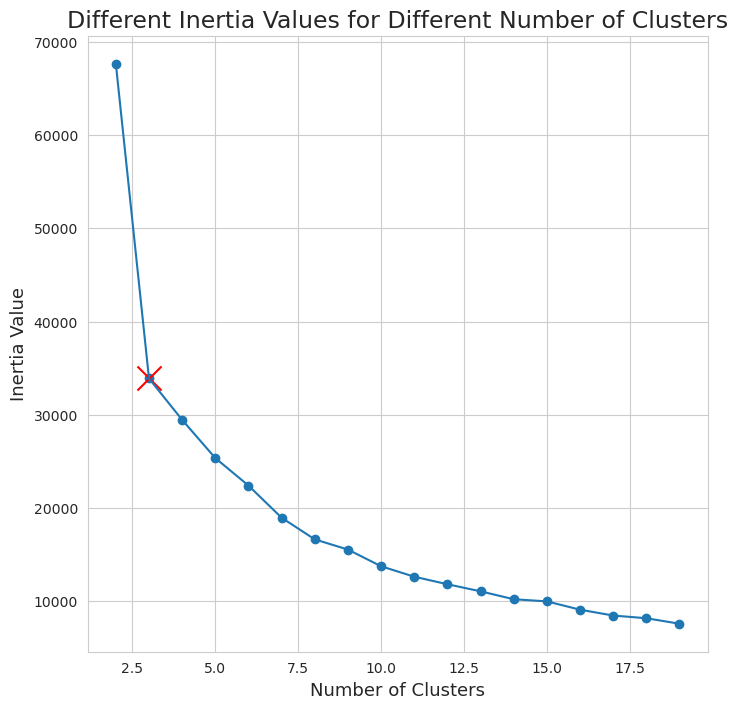

In [13]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
# Set the size of the plot
plt.rcParams['figure.figsize'] = [8,8]
# Set the style of the plot
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for num_clusters in range(2, 20):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++", random_state=42)
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)
    
    print("For n_clusters =", num_clusters,"The inertia is :", kmeans_model.inertia_)
    
# plot the inertia curve
plt.plot(range(2,20),inertia_list)
plt.scatter(range(2,20),inertia_list)
# Viewing the inertia values, 3 can be the elbow point
plt.scatter(3, inertia_list[1], marker="x", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17);

Another example of selecting the optimal number of $K$ clusters is using the elbow method and the 'inertia_'

For n_clusters = 2 The average silhouette_score is : 0.6938856233529058
For n_clusters = 2 The average davies_boulder is is : 0.39180038020871943
For n_clusters = 3 The average silhouette_score is : 0.5991115041676235
For n_clusters = 3 The average davies_boulder is is : 0.618001021513471
For n_clusters = 4 The average silhouette_score is : 0.6688590723938942
For n_clusters = 4 The average davies_boulder is is : 0.48553234162452674
For n_clusters = 5 The average silhouette_score is : 0.7214529381015552
For n_clusters = 5 The average davies_boulder is is : 0.4085552676821872
For n_clusters = 6 The average silhouette_score is : 0.6654540951359249
For n_clusters = 6 The average davies_boulder is is : 0.5216753699123807
For n_clusters = 7 The average silhouette_score is : 0.6863381301936146
For n_clusters = 7 The average davies_boulder is is : 0.39835292076738804
For n_clusters = 8 The average silhouette_score is : 0.6053973769454056
For n_clusters = 8 The average davies_boulder is is : 0.

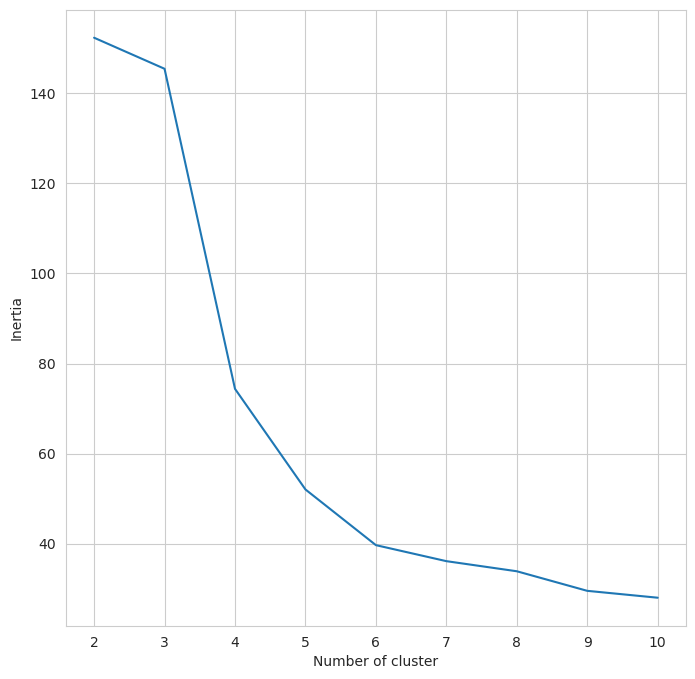

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score

# Load the iris dataset without the target variable
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris['feature_names'])
data = X

sse = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42).fit(data)
    
    cluster_labels = kmeans.labels_
    data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    silhouette_avg = silhouette_score(data, cluster_labels)
    print("For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)
    
    davies = davies_bouldin_score(data, cluster_labels)
    print("For n_clusters =", k,"The average davies_boulder is is :", davies)
    
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.show()

In [15]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,4
2,4.7,3.2,1.3,0.2,4
3,4.6,3.1,1.5,0.2,4
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,5
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,8
148,6.2,3.4,5.4,2.3,5


### Another metrics to evaluate clusters

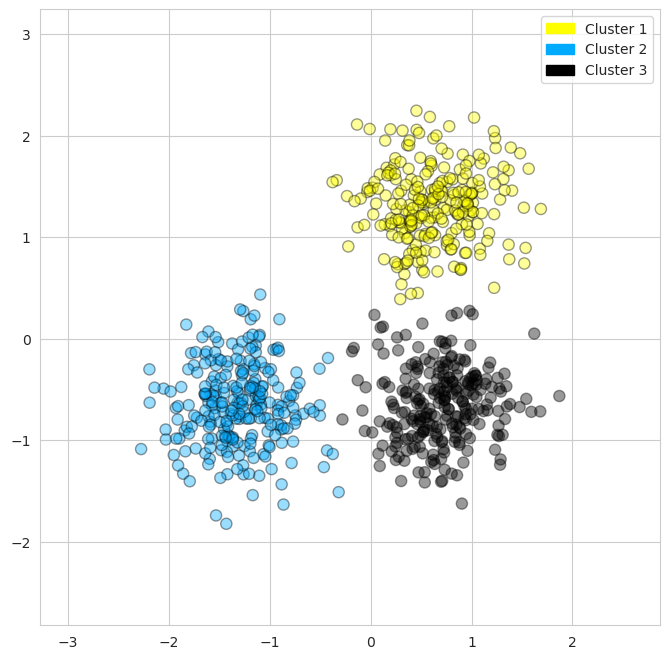

In [16]:
from sklearn import datasets
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

# #############################################################################

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

cls_assignment = kmeans.fit_predict(X)
plot_labelled_scatter(X, cls_assignment, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

In [17]:
labels = kmeans.labels_
print(kmeans.cluster_centers_)
print(kmeans.inertia_)
print(davies_bouldin_score(X, labels))
print(silhouette_score(X, labels))

[[ 0.62260555  1.3172598 ]
 [-1.30266211 -0.65704205]
 [ 0.6954587  -0.64442334]]
212.391322494727
0.47620136185481915
0.6496075455022047


#### Silhouette

For n_clusters = 2 The average silhouette_score is : 0.516770439467514
For n_clusters = 3 The average silhouette_score is : 0.6496075455022047
For n_clusters = 4 The average silhouette_score is : 0.5396642897652973
For n_clusters = 5 The average silhouette_score is : 0.3956439044106136
For n_clusters = 6 The average silhouette_score is : 0.29937058604168815
For n_clusters = 7 The average silhouette_score is : 0.34311455775306454
For n_clusters = 8 The average silhouette_score is : 0.33973437414820973
For n_clusters = 9 The average silhouette_score is : 0.34451116087273886


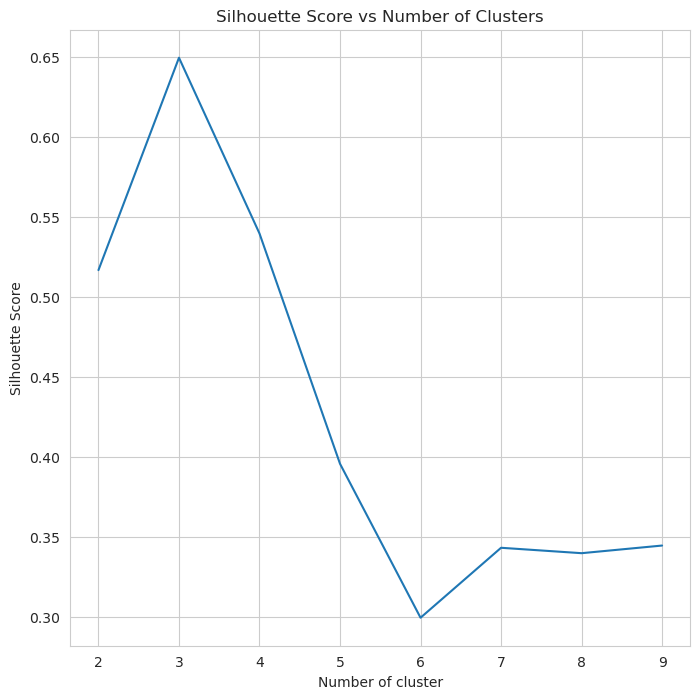

In [18]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++').fit(X)
    
    cluster_labels = kmeans.labels_
 
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)
    sse[k]=silhouette_avg
   
    # davies = davies_bouldin_score(X, cluster_labels)
    # print("For n_clusters =", k,"The average davies_boulder is is :", davies)
     
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()

#### Davies

For n_clusters = 2 The davies_bouldin_score is : 0.7157035479666186
For n_clusters = 3 The davies_bouldin_score is : 0.47620136185481915
For n_clusters = 4 The davies_bouldin_score is : 0.8088766585379885
For n_clusters = 5 The davies_bouldin_score is : 0.7654139980963889
For n_clusters = 6 The davies_bouldin_score is : 0.8601612316181884
For n_clusters = 7 The davies_bouldin_score is : 1.0685973452441178
For n_clusters = 8 The davies_bouldin_score is : 0.9753284408450349
For n_clusters = 9 The davies_bouldin_score is : 0.9470989462662845


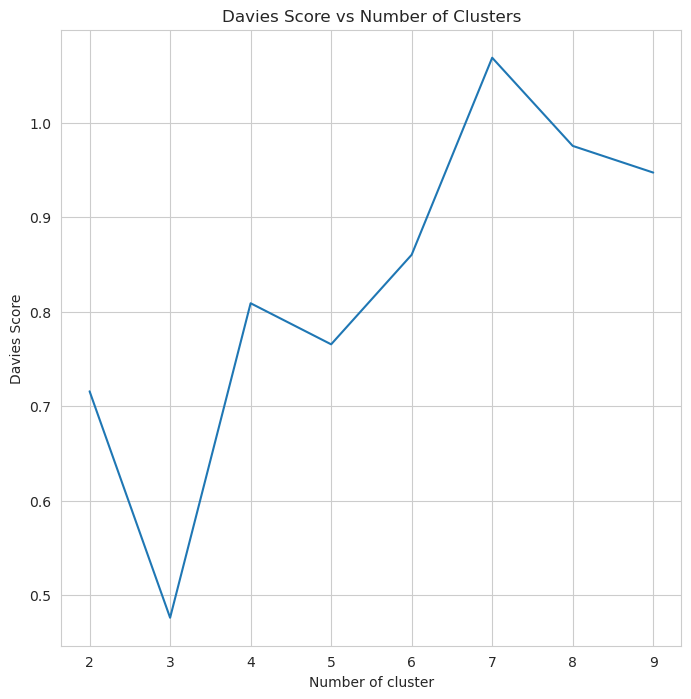

In [19]:
sse = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k,init='k-means++').fit(X)
    
    cluster_labels = kmeans.labels_
 
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
    davies = davies_bouldin_score(X, cluster_labels)
    print("For n_clusters =", k,"The davies_bouldin_score is :", davies)
    sse[k] = davies

     
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies Score")
plt.title("Davies Score vs Number of Clusters")
plt.show()

It's possible calculate silhouette for each point

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X, y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
   
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    print(sample_silhouette_values)
    print('----------------------------------------------------------------------------------------')

For n_clusters = 2 The average silhouette_score is : 0.6903439735221752
[0.7212505  0.69240964 0.69575063 0.62229105 0.82037356 0.86546893
 0.48310589 0.52948457 0.62765562 0.68684069 0.51827244 0.55331403
 0.70395124 0.67177107 0.68314633 0.60211438 0.42055221 0.71467243
 0.87443507 0.88531294 0.66193543 0.71187835 0.65231572 0.66359002
 0.75935347 0.55334993 0.38951984 0.69292185 0.64883543 0.84042342
 0.88578431 0.70342618 0.8702533  0.6686321  0.71275752 0.81241042
 0.67044197 0.59550045 0.69333264 0.68180715 0.71829412 0.42874673
 0.28208933 0.7024434  0.66201532 0.83830363 0.66095738 0.65988846
 0.65828285 0.86483861 0.64835483 0.8268791  0.87807151 0.68667792
 0.62027875 0.62379859 0.89074746 0.8901691  0.72385147 0.62535136
 0.53972269 0.82228732 0.70746292 0.69684526 0.62684721 0.65779278
 0.63143785 0.71230634 0.65684586 0.88031031 0.68279034 0.71080225
 0.70738501 0.4013918  0.66527706 0.87217779 0.65371825 0.6966188
 0.59151325 0.75100948 0.68251229 0.73272308 0.68902159 0.

## Agglomerative clustering

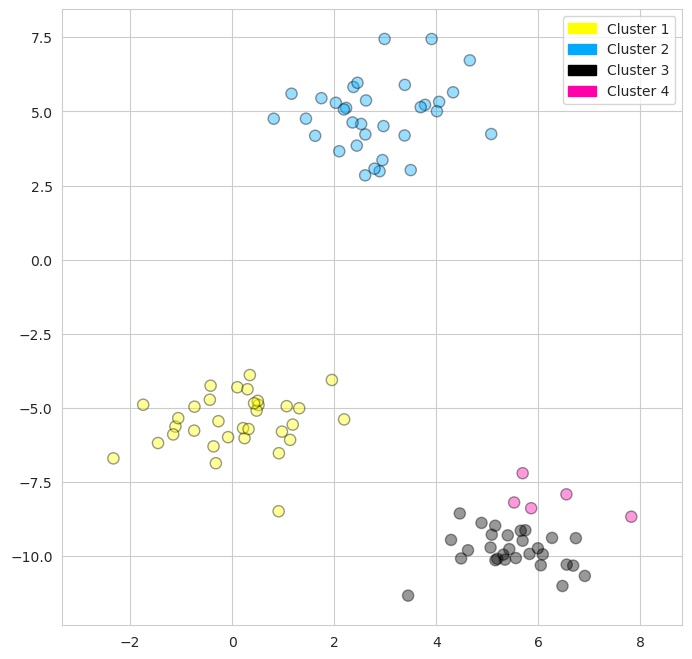

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10) #100 samples, 2 features, 3 centers by default

# Linkage methods: 'ward', 'complete', 'average', 'single', we choose 'complete' 
# The 'complete' linkage uses the maximum distances between all observations of the two sets.
cls = AgglomerativeClustering(n_clusters = 4, linkage='complete')
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

In [22]:
cls.n_clusters_

4

In [23]:
cls.labels_

array([0, 0, 1, 2, 1, 1, 2, 0, 1, 3, 2, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0,
       1, 0, 3, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 3, 0, 0,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 3, 0, 3, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2])

In [24]:
# This was returned by the method '.fit_predict' apply to AgglomerativeClustering object, is the same that use '.labels_' attribute
print(cls_assignment)
import numpy as np
print((cls_assignment == cls.labels_))
# Verify that there is no 'False' in the comparison
print(np.all(cls_assignment == cls.labels_))

[0 0 1 2 1 1 2 0 1 3 2 1 1 0 0 1 2 1 2 1 2 0 1 0 3 1 1 1 1 2 0 1 1 2 0 0 0
 1 1 1 0 3 0 0 1 2 2 2 0 2 1 0 2 3 0 3 1 0 2 2 1 1 0 0 0 2 2 0 0 0 1 2 1 1
 0 1 1 0 2 2 2 1 2 1 0 1 0 2 0 0 2 2 2 0 0 0 1 2 2 2]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
True


In [25]:
cls.n_leaves_

100

In [26]:
# Make a prediction with the trained model
cls = AgglomerativeClustering(n_clusters = 4, linkage='complete').fit(X)
cls.fit_predict([[0, 0], [1, 1], [0, 1], [1, 0]])

array([3, 2, 1, 0])

Use metrics like Davies Bouldin and Silhouette is possible with AgglomerativeClustering, since it only requieres data instances X and labels Y.

In [27]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

sse = {}
for k in range(2, 10):
    cls = AgglomerativeClustering(n_clusters = k, linkage='complete')
    cls_assignment = cls.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cls_assignment)
    print("For n_clusters =", k,"The average silhouette_score is :", silhouette_avg)
    
    davies = davies_bouldin_score(X, cls_assignment)
    print(        "For n_clusters =", k,"The average davies_boulder is is :", davies)

For n_clusters = 2 The average silhouette_score is : 0.7139217165170764
For n_clusters = 2 The average davies_boulder is is : 0.3987137462288316
For n_clusters = 3 The average silhouette_score is : 0.7823749853353591
For n_clusters = 3 The average davies_boulder is is : 0.2962526319512608
For n_clusters = 4 The average silhouette_score is : 0.6544600049052991
For n_clusters = 4 The average davies_boulder is is : 0.5877021588325123
For n_clusters = 5 The average silhouette_score is : 0.5036096433465835
For n_clusters = 5 The average davies_boulder is is : 0.8730472410366856
For n_clusters = 6 The average silhouette_score is : 0.37501832192879575
For n_clusters = 6 The average davies_boulder is is : 0.9167302125531348
For n_clusters = 7 The average silhouette_score is : 0.3829866740012089
For n_clusters = 7 The average davies_boulder is is : 0.865181252730317
For n_clusters = 8 The average silhouette_score is : 0.338138969719737
For n_clusters = 8 The average davies_boulder is is : 0.975

#### Creating a dendrogram (using scipy) 
It's useful to decide the number of agglomerative clusters.

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example (since the random_state is the same), as plotted here:

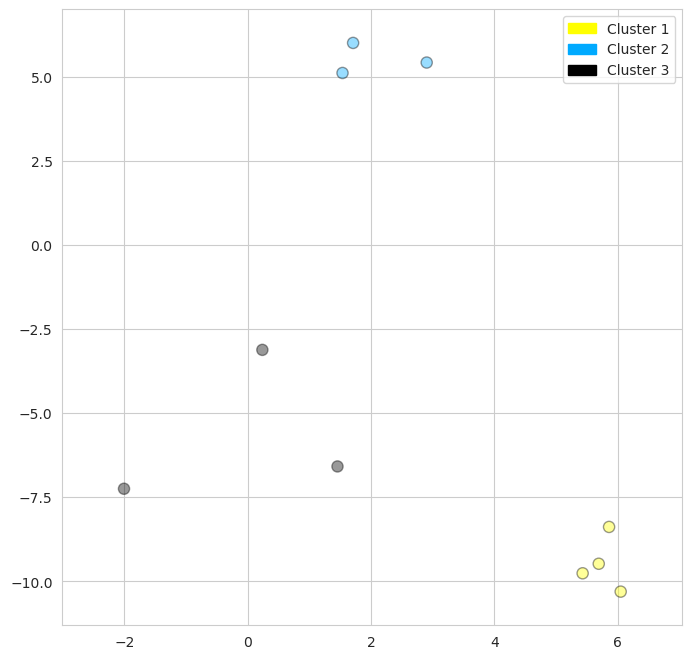

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [28]:
X1, y1 = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X1, y1, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X1)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

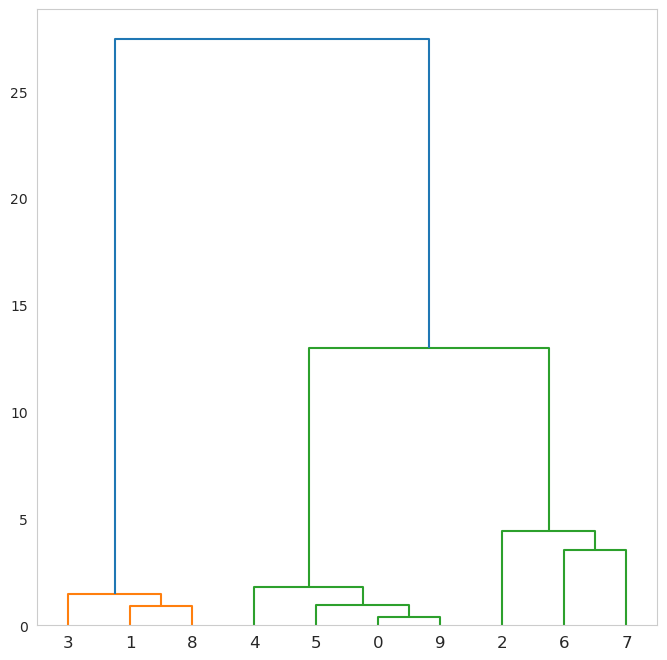

In [29]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
plt.grid(False)
dendrogram(ward(X1))
plt.show()

With more data, more complexity of the herarchycal clusters.

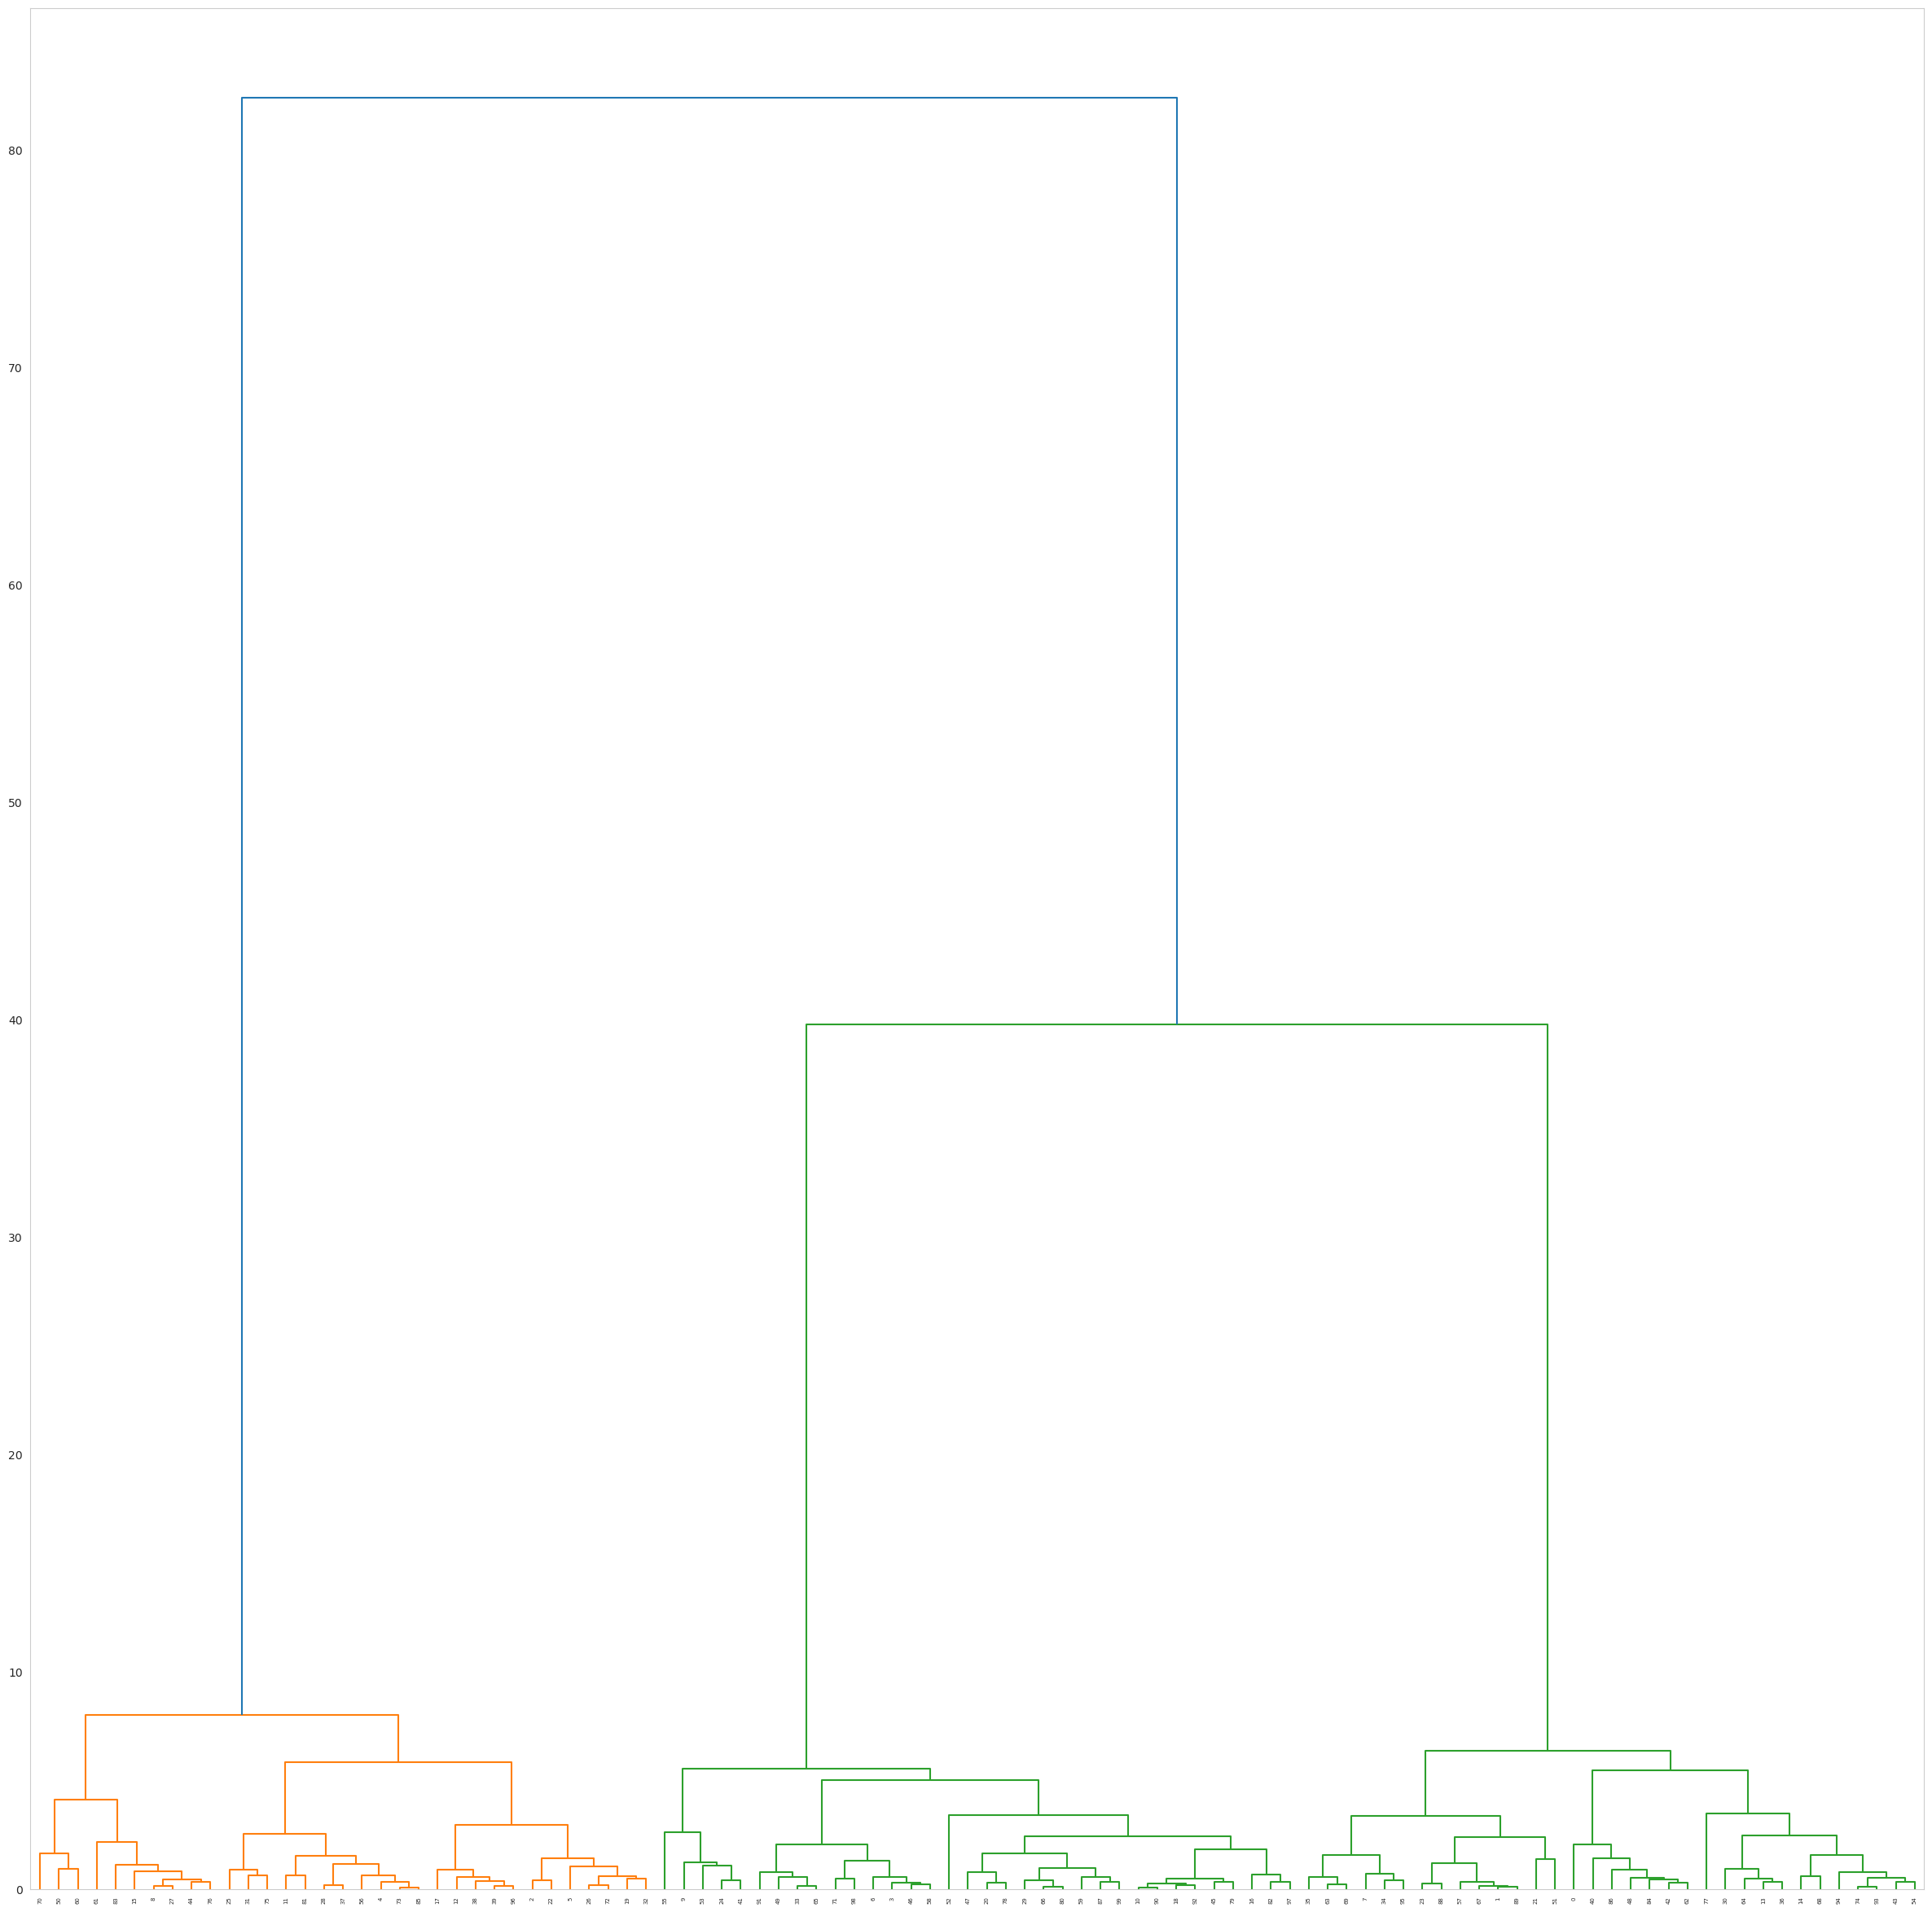

In [30]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure(figsize=(30, 30))
plt.grid(False)
dendrogram(ward(X))
plt.show()

## DBSCAN clustering

The noisy points are labeled by algorithm with *-1*.

Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


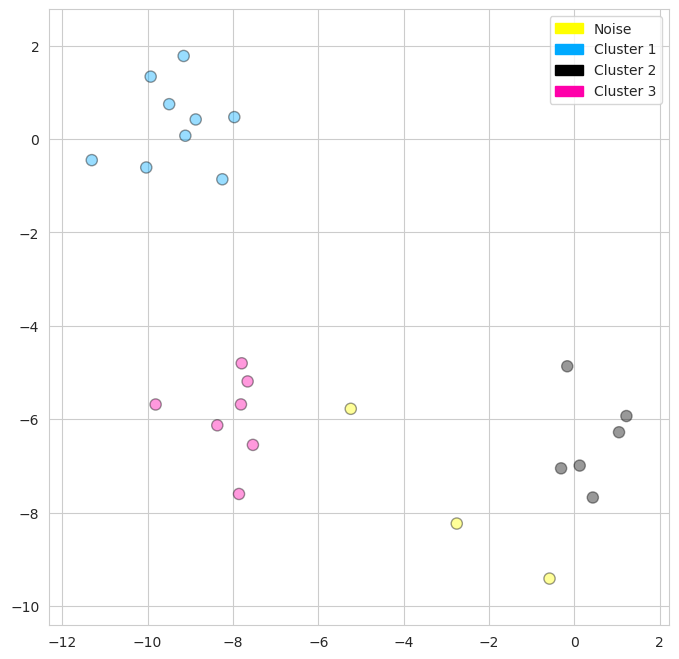

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

# Increse 'eps' dissapears the outliers, since the data dimension is 2, an apropiate value for min_samples is 4
dbscan = DBSCAN(eps = 2, min_samples = 4)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 1', 'Cluster 2', 'Cluster 3'])

### Optimal 'eps' $\varepsilon$ calculation

In [32]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=4) # n_neighbors es elvalor de min_samples que es 2*Dimension
distances, indices = neighbors.fit(X).kneighbors(X)

In [33]:
distances

array([[0.        , 0.90606489, 1.21486985, 1.36063015],
       [0.        , 0.44007724, 0.7496599 , 1.16588096],
       [0.        , 1.14071872, 1.28627737, 1.45808317],
       [0.        , 0.71223973, 0.93454762, 1.17843148],
       [0.        , 0.42482488, 0.77439743, 1.14071872],
       [0.        , 0.70224092, 0.73237806, 0.77439743],
       [0.        , 0.42482488, 0.70224092, 0.90606489],
       [0.        , 0.412419  , 0.51695087, 1.17843148],
       [0.        , 1.10062901, 1.55642167, 1.91855246],
       [0.        , 2.47277847, 2.71579747, 3.13708541],
       [0.        , 0.44007724, 0.97114954, 1.56243736],
       [0.        , 0.51695087, 0.71223973, 0.88120587],
       [0.        , 1.28627737, 2.17410873, 2.2540755 ],
       [0.        , 1.27372479, 1.36063015, 1.42536198],
       [0.        , 2.41977175, 2.48734214, 2.5754205 ],
       [0.        , 0.73237806, 0.89072668, 1.39807483],
       [0.        , 0.89072668, 1.08690091, 1.38859687],
       [0.        , 0.7496599 ,

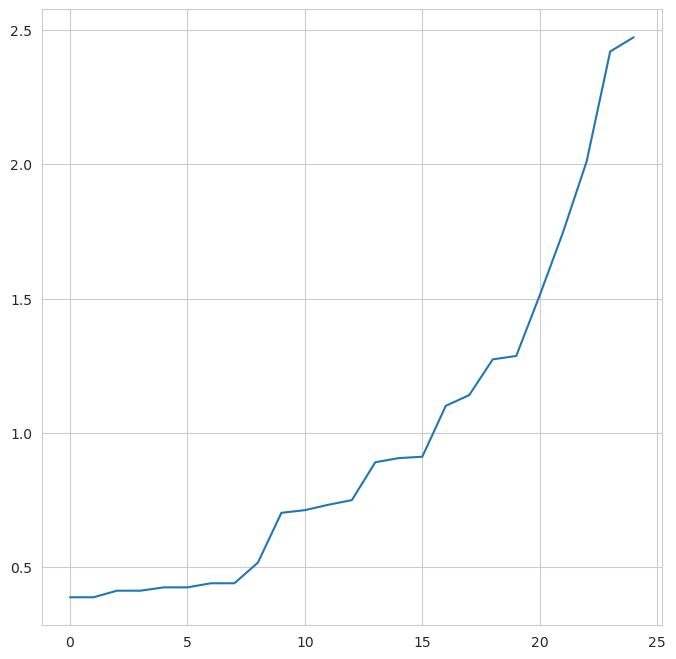

In [34]:
# Import the required libraries
import numpy as np
import matplotlib.pyplot as plt

# Now use the libraries
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances);

Viewing the graphic, a good epsilon value could be between 2.0 and 2.5

## Metricas de medicion de la "compacidad"-compactness

In [35]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
# #############################################################################

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=8).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# Where there are core samples, the value is True
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [36]:
"""Number of clusters in labels, ignoring noise if present.
Here, we cast the labels to a set to get unique values and then subtract
1 if '-1' is in labels (indicating noise) to get the number of clusters"""
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# Count the number of noise points
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 13


In [37]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("Davies Bouldin Score: %0.3f" % metrics.davies_bouldin_score(X, labels))

Homogeneity: 0.948
Completeness: 0.892
V-measure: 0.919
Adjusted Rand Index: 0.954
Adjusted Mutual Information: 0.919
Silhouette Coefficient: 0.623
Davies Bouldin Score: 2.082


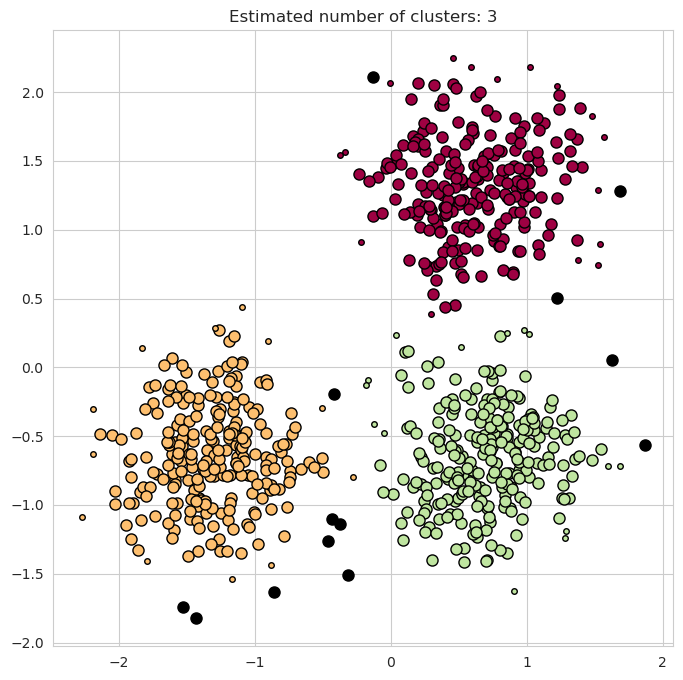

In [38]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
# Generate a color map
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    # Check if the sample is a core sample and then plot it bigger
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=8,
    )

    # Check if the sample is a non-core sample and then plot it smaller
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize = (8 if k == -1 else 4),
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()